sewing machine, refrigerator, typewriter, Bookcase, Frame, lumber, TV, Audio, fax machine, chair, dish dryer, bicycle, arcade machine, TV stand, audio cabinet, Wardrobe, Display cabinet, Cupboard, Rice storage container, Stroller, Signboard, Washing machine, Speaker, Desk, Vanity table, Wall clock, Earthenware jar, Water tank, Air conditioner, Fan, Dining table, Small cabinet, Mannequin, Sink, Bedding items, Gas oven range, Heater, Cabinet, Drawer unit, Clothes drying rack, Toilet bowl, Spin dryer, Electric rice cooker, Kitchen sink, Shoe rack, Trunk, suitcase, Bathtub, Air purifier, Video player, Bed, Coat rack, Display stand, Floor covering, Microwave, Vacuum cleaner, Table, Sofa, Door panel, Mat, Bamboo mat, Computer ,Main unit, Monitor, Printer, Humidifier, Bookstand, Piano, Aquarium, Carpet, PP bag, General waste bag

### ios에서 돌리셔야 합니다.
ssl._create_default_https_context = ssl._create_unverified_context,
mps를 사용하였습니다.

In [1]:
import onnxruntime as ort
import numpy as np
import cv2
import os

In [2]:
class_labels = {
    0: "Electronics/Office Equipment",  # sewing machine
    1: "Home Appliances",              # refrigerator
    2: "Electronics/Office Equipment",  # typewriter
    3: "Furniture",                    # Bookcase
    4: "Home Goods",                   # Frame
    5: "Home Goods",                   # lumber
    6: "Home Appliances",              # TV
    7: "Electronics/Office Equipment",  # Audio
    8: "Electronics/Office Equipment",  # fax machine
    9: "Furniture",                    # chair
    10: "Home Appliances",             # dish dryer
    11: "Home Goods",                  # bicycle
    12: "Electronics/Office Equipment", # arcade machine
    13: "Furniture",                   # TV stand
    14: "Storage/Organization",        # audio cabinet
    15: "Furniture",                   # Wardrobe
    16: "Furniture",                   # Display cabinet
    17: "Furniture",                   # Cupboard
    18: "Home Goods",                  # Rice storage container
    19: "Home Goods",                  # Stroller
    20: "Home Goods",                  # Signboard
    21: "Home Appliances",             # Washing machine
    22: "Electronics/Office Equipment", # Speaker
    23: "Furniture",                   # Desk
    24: "Furniture",                   # Vanity table
    25: "Home Goods",                  # Wall clock
    26: "Home Goods",                  # Earthenware jar
    27: "Home Goods",                  # Water tank
    28: "Home Appliances",             # Air conditioner
    29: "Home Appliances",             # Fan
    30: "Furniture",                   # Dining table
    31: "Furniture",                   # Small cabinet
    32: "Home Goods",                  # Mannequin
    33: "Fixtures",                    # Sink
    34: "Pile",                  # Bedding items
    35: "Home Appliances",             # Gas oven range
    36: "Home Appliances",             # Heater
    37: "Furniture",                   # Cabinet
    38: "Furniture",                   # Drawer unit
    39: "Home Goods",                  # Clothes drying rack
    40: "Home Goods",                  # Toilet bowl
    41: "Home Appliances",             # Spin dryer
    42: "Home Appliances",             # Electric rice cooker
    43: "Fixtures",                    # Kitchen sink
    44: "Furniture",                   # Shoe rack
    45: "Storage/Organization",        # Trunk, suitcase
    46: "Home Goods",                  # Bathtub
    47: "Home Appliances",             # Air purifier
    48: "Electronics/Office Equipment", # Video player
    49: "Furniture",                   # Bed
    50: "Home Goods",                  # Coat rack
    51: "Home Goods",                  # Floor covering
    52: "Home Appliances",             # Microwave
    53: "Home Appliances",             # Vacuum cleaner
    54: "Furniture",                   # Table
    55: "Furniture",                   # Sofa
    56: "Home Goods",                  # Door panel
    57: "Home Goods",                  # Mat
    58: "Home Goods",                  # Bamboo mat
    59: "Electronics/Office Equipment", # Computer
    60: "Electronics/Office Equipment", # Main unit
    61: "Electronics/Office Equipment", # Monitor
    62: "Electronics/Office Equipment", # Printer
    63: "Home Appliances",             # Humidifier
    64: "Furniture",                   # Bookstand
    65: "Home Goods",                  # Piano
    66: "Home Goods",                  # Aquarium
    67: "Home Goods",                  # Carpet
    68: "PP bag",        # PP bag
    69: "Storage/Organization"         # General waste bag
}

In [3]:
color_map = {
        'pile': (0, 0, 255),       # 빨간색 
}

In [4]:
# class_labels = {
# 0: "sewing machine",
# 1: "refrigerator",
# 2: "typewriter",
# 3: "Bookcase",
# 4: "Frame",
# 5: "lumber",
# 6: "TV",
# 7: "Audio",
# 8: "fax machine",
# 9: "chair",
# 10: "dish dryer",
# 11: "bicycle",
# 12: "arcade machine",
# 13: "TV stand",
# 14: "audio cabinet",
# 15: "Wardrobe",
# 16: "Display cabinet",
# 17: "Cupboard",
# 18: "Rice storage container",
# 19: "Stroller",
# 20: "Signboard",
# 21: "Washing machine",
# 22: "Speaker",
# 23: "Desk",
# 24: "Vanity table",
# 25: "Wall clock",
# 26: "Earthenware jar",
# 27: "Water tank",
# 28: "Air conditioner",
# 29: "Fan",
# 30: "Dining table",
# 31: "Small cabinet",
# 32: "Mannequin",
# 33: "Sink",
# 34: "Bedding items",
# 35: "Gas oven range",
# 36: "Heater",
# 37: "Cabinet",
# 38: "Drawer unit",
# 39: "Clothes drying rack",
# 40: "Toilet bowl",
# 41: "Spin dryer",
# 42: "Electric rice cooker",
# 43: "Kitchen sink",
# 44: "Shoe rack",
# 45: "Trunk, suitcase",
# 46: "Bathtub",
# 47: "Air purifier",
# 48: "Video player",
# 49: "Bed",
# 50: "Coat rack",
# 51: "Floor covering",
# 52: "Microwave",
# 53: "Vacuum cleaner",
# 54: "Table",
# 55: "Sofa",
# 56: "Door panel",
# 57: "Mat",
# 58: "Bamboo mat",
# 59: "Computer",
# 60: "Main unit",
# 61: "Monitor",
# 62: "Printer",
# 63: "Humidifier",
# 64: "Bookstand",
# 65: "Piano",
# 66: "Aquarium",
# 67: "Carpet",
# 68: "PP bag",
# 69: "General waste bag"
# }

In [5]:
def iou(box1, box2):
    # 바운딩 박스 좌표 추출
    x1_1, y1_1, x2_1, y2_1 = box1
    x1_2, y1_2, x2_2, y2_2 = box2

    # 교차 영역 좌표 계산
    x1_inter = max(x1_1, x1_2)
    y1_inter = max(y1_1, y1_2)
    x2_inter = min(x2_1, x2_2)
    y2_inter = min(y2_1, y2_2)

    # 교차 영역 넓이 계산
    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    # 각 바운딩 박스의 넓이 계산
    box1_area = (x2_1 - x1_1) * (y2_1 - y1_1)
    box2_area = (x2_2 - x1_2) * (y2_2 - y1_2)

    # IoU 계산
    iou_value = inter_area / (box1_area + box2_area - inter_area)
    return iou_value

In [6]:
def non_max_suppression(boxes, scores, iou_threshold=0.5):
    # 신뢰도를 기준으로 내림차순 정렬
    indices = np.argsort(scores)[::-1]
    selected_boxes = []

    while len(indices) > 0:
        # 신뢰도가 가장 높은 바운딩 박스를 선택
        current_box = boxes[indices[0]]
        selected_boxes.append(indices[0])

        # 나머지 바운딩 박스들과의 IoU 계산
        remaining_indices = []
        for i in indices[1:]:
            if iou(current_box, boxes[i]) < iou_threshold:
                remaining_indices.append(i)

        # 신뢰도가 높은 것만 남기기
        indices = remaining_indices

    return selected_boxes

In [7]:
import cv2
import numpy as np
import onnxruntime as ort
def process_image(image_path, label):
    with open(image_path, "rb") as f:
        file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)

    # OpenCV를 통해 이미지를 디코딩하여 불러옴
    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

    if image is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        return

    original_height, original_width = image.shape[:2]

    # 이미지 중심점 계산
    image_center_x = original_width // 2
    image_center_y = original_height // 2

    # 모델 입력 크기에 맞게 이미지 조정
    input_image = cv2.resize(image, (640, 640))  # YOLO-World 입력 크기에 맞게 조정
    input_image = input_image.transpose(2, 0, 1)  # 채널 순서 변경 (HWC -> CHW)
    input_image = np.expand_dims(input_image, axis=0)  # 배치 차원 추가
    input_image = input_image.astype(np.float32) / 255.0  # 정규화

    # 입력 이름 확인
    input_name = ort_session.get_inputs()[0].name

    # 모델 실행
    outputs = ort_session.run(None, {input_name: input_image})
        
    
    # 출력 해석
    boxes = outputs[1][0]  # 바운딩 박스 좌표 (640x640 이미지 기준)
    scores = outputs[2][0]  # 신뢰도
    class_ids = outputs[3][0]  # 클래스 ID
    # confidence_threshold = 0

    
    
    # # 신뢰도가 임계값을 넘는 객체만 필터링
    # filtered_indices = [i for i, score in enumerate(scores) if score > confidence_threshold]
    # filtered_boxes = boxes[filtered_indices]
    # filtered_scores = scores[filtered_indices]
    # filtered_class_ids = class_ids[filtered_indices]

    # # NMS 적용
    # selected_indices = non_max_suppression(filtered_boxes, filtered_scores, iou_threshold=0.5)

    # 중심에 가장 가까운 바운딩 박스를 찾기 위한 변수 초기화
    closest_box = None
    min_distance = float('inf')

    # 다수의 객체를 처리하는 반복문
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i]  # 바운딩 박스 좌표 (640x640 기준)
        
        # 바운딩 박스 좌표를 원본 이미지 크기에 맞게 변환
        x1 = int(x1 / 640 * original_width)
        y1 = int(y1 / 640 * original_height)
        x2 = int(x2 / 640 * original_width)
        y2 = int(y2 / 640 * original_height)
        
        # 바운딩 박스의 중심점 계산
        box_center_x = (x1 + x2) // 2
        box_center_y = (y1 + y2) // 2
        
        # 이미지 중심점과 바운딩 박스 중심점 사이의 거리 계산
        distance = ((box_center_x - image_center_x) ** 2 + (box_center_y - image_center_y) ** 2) ** 0.5
        
        # 가장 가까운 바운딩 박스 업데이트
        if distance < min_distance:
            min_distance = distance
            closest_box = (x1, y1, x2, y2)

        # class_name = class_labels.get(int(filtered_class_ids[i]), 'Unknown')
        # label = f"{class_name} {filtered_scores[i]:.2f}"

        # # 색상 지정
        # color = (0, 255, 0)  # 초록색
        # cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)  # 바운딩 박스 그리기
        # cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    if closest_box:
        return closest_box
        # x1, y1, x2, y2 = closest_box
        # print(f"가장 가운데에 있는 바운딩 박스 좌표: 좌상단({x1}, {y1}), 우하단({x2}, {y2})")
        
        # # 가장 가운데 있는 바운딩 박스의 중심 픽셀 값 가져오기
        # center_x = (x1 + x2) // 2
        # center_y = (y1 + y2) // 2
        # center_pixel_value = image[center_y, center_x]
        # print(f"중심 픽셀 값 (B, G, R): {center_pixel_value}")

    
    # max_width = 1600  # 최대 너비 설정
    # max_height = 1200  # 최대 높이 설정

    # # 비율 유지하며 이미지 크기 조정
    # height, width = image.shape[:2]
    # scaling_factor = min(max_width / width, max_height / height)
    # new_size = (int(width * scaling_factor), int(height * scaling_factor))
    # resized_image = cv2.resize(image, new_size)

    # cv2.imshow('Result', resized_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # # 검출된 객체 정보 출력
    # print(f"이미지: {image_path}")
    # print("검출된 객체 정보:")
    # for i in range(len(class_ids)):
    #     class_name = class_labels.get(int(class_ids[i]), 'Unknown')
        
    #     if class_name.lower() == label.lower():
    #         return True
            
    # return False

In [8]:
def process_image_after(image,image_path):

    with open(image_path, "rb") as f:
        file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)

    # OpenCV를 통해 이미지를 디코딩하여 불러옴
    src = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

    if image is None:
        print(f"이미지를 불러올 수 없습니다: {image_path}")
        return


    original_height, original_width = image.shape[:2]

    # 모델 입력 크기에 맞게 이미지 조정
    input_image = cv2.resize(image, (640, 640))  # YOLO-World 입력 크기에 맞게 조정
    input_image = input_image.transpose(2, 0, 1)  # 채널 순서 변경 (HWC -> CHW)
    input_image = np.expand_dims(input_image, axis=0)  # 배치 차원 추가
    input_image = input_image.astype(np.float32) / 255.0  # 정규화

    # 입력 이름 확인
    input_name = ort_session.get_inputs()[0].name

    # 모델 실행
    outputs = ort_session.run(None, {input_name: input_image})

    # for obj in outputs:
       
    
    # 출력 해석
    boxes = outputs[1][0]  # 바운딩 박스 좌표 (640x640 이미지 기준)
    scores = outputs[2][0]  # 신뢰도
    class_ids = outputs[3][0]  # 클래스 ID
    confidence_threshold = 0.1
    for i, ids in enumerate(class_ids):
        if ids == 69:
            scores[i] = 0
    # 신뢰도가 임계값을 넘는 객체만 필터링
    filtered_indices = [i for i, score in enumerate(scores) if score > confidence_threshold]
    filtered_boxes = boxes[filtered_indices]
    filtered_scores = scores[filtered_indices]
    filtered_class_ids = class_ids[filtered_indices]
    
    # NMS 적용
    selected_indices = non_max_suppression(filtered_boxes, filtered_scores, iou_threshold=0.5)
    
    # 다수의 객체를 처리하는 반복문
    for i in selected_indices:
        x1, y1, x2, y2 = filtered_boxes[i]  # 바운딩 박스 좌표 (640x640 기준)
        
        # 바운딩 박스 좌표를 원본 이미지 크기에 맞게 변환
        x1 = int(x1 / 640 * original_width)
        y1 = int(y1 / 640 * original_height)
        x2 = int(x2 / 640 * original_width)
        y2 = int(y2 / 640 * original_height)
        
        class_name = class_labels.get(int(filtered_class_ids[i]), 'Unknown')
        label = f"{class_name} {filtered_scores[i]:.2f}"
        color = color_map.get(class_name.lower(), (0, 255, 0))
        # 색상 지정
        cv2.rectangle(src, (x1, y1), (x2, y2), color, 2)  # 바운딩 박스 그리기
        cv2.putText(src, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    max_width = 1600  # 최대 너비 설정
    max_height = 1200  # 최대 높이 설정

    # 비율 유지하며 이미지 크기 조정
    height, width = src.shape[:2]
    scaling_factor = min(max_width / width, max_height / height)
    new_size = (int(width * scaling_factor), int(height * scaling_factor))
    resized_image = cv2.resize(src, new_size)

    cv2.imshow('Result', resized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # # 검출된 객체 정보 출력
    # print(f"이미지: {image_path}")
    # print("검출된 객체 정보:")
    # for i in range(len(class_ids)):
    #     class_name = class_labels.get(int(class_ids[i]), 'Unknown')
        
    #     # print(f"클래스 ID: {class_name}, 신뢰도: {filtered_scores[i]:.2f}")
    #     if class_name.lower() == label.lower():
    #         return True
            
    # return False
    # # print('-------------------')


In [9]:
import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context # 맥북용

def process_depth_image(filename, bounding_box):
    # MiDaS 모델 로드
    model_type = "MiDaS_small"
    midas = torch.hub.load("intel-isl/MiDaS", model_type)
    midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

    device = torch.device("cpu")
    midas.to(device)
    midas.eval()

    transform = midas_transforms.small_transform

    # 이미지 로드 및 전처리
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    input_batch = transform(img).to(device)

    # 깊이 예측
    with torch.no_grad():
        prediction = midas(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    output = prediction.cpu().numpy()

    # 바운딩 박스 좌표
    x1, y1, x2, y2 = bounding_box

    # 바운딩 박스 영역의 깊이 값 추출
    depth_region = output[y1:y2, x1:x2]

    # 깊이 값의 평균 계산
    average_depth = np.mean(depth_region)

    threshold = average_depth  # 평균 깊이를 임계값으로 사용

    # 임계값보다 큰 깊이 값에 해당하는 영역을 마스크
    boutput = output > threshold
    
    # 색상 정보를 복사하여 새로운 이미지 생성
    src = np.zeros_like(img)
    src[boutput] = img[boutput]
    
    plt.imshow(src)  # 결과 이미지를 시각화
    plt.axis('off')  # 축 제거
    plt.show()

    # 시각화
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(output)
    plt.title("전체 깊이 맵")
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow(output)
    plt.title("바운딩 박스 영역")
    plt.colorbar()
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)

    plt.tight_layout()
    plt.show()

    return src


In [10]:
import time
def process_folder(folder_path):
    per = []
    
    for root, dirs, files in os.walk(folder_path):
        # sum_t = 0
        # sum_f = 0
        # count = 0
        # 현재 폴더의 이름을 가져온다
        current_folder_name = os.path.basename(root)
        
        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(root, filename)
                # start_time = time.time()
                process_image_after(process_depth_image(image_path, process_image(image_path, current_folder_name)), image_path)
                # end_time = time.time()
                # execution_time = end_time - start_time
                # 폴더 이름과 파일 이름을 함께 출력
                # print(f"Folder: {current_folder_name}, File: {filename}, Execution Time: {execution_time:.4f} seconds")
                print(f"Folder: {current_folder_name}, File: {filename}")

Using cache found in /Users/chlwjddn/.cache/torch/hub/intel-isl_MiDaS_master
/Users/chlwjddn/myenv/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Loading weights:  None


Using cache found in /Users/chlwjddn/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /Users/chlwjddn/.cache/torch/hub/intel-isl_MiDaS_master


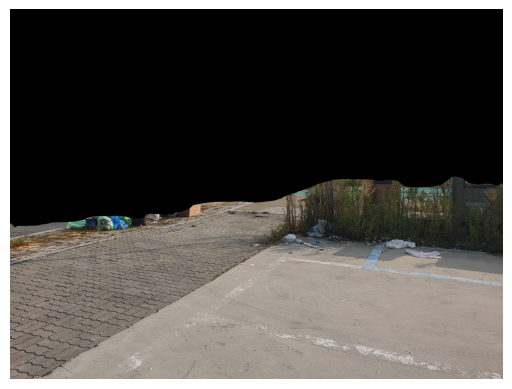

/var/folders/9j/3whv62l14nl2k81yjktgbf_40000gn/T/ipykernel_7347/2607883112.py:76: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9j/3whv62l14nl2k81yjktgbf_40000gn/T/ipykernel_7347/2607883112.py:76: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9j/3whv62l14nl2k81yjktgbf_40000gn/T/ipykernel_7347/2607883112.py:76: UserWarning: Glyph 44618 (\N{HANGUL SYLLABLE GIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9j/3whv62l14nl2k81yjktgbf_40000gn/T/ipykernel_7347/2607883112.py:76: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9j/3whv62l14nl2k81yjktgbf_40000gn/T/ipykernel_7347/2607883112.py:76: UserWarning: Glyph 47605 (\N{HANGUL SYLLABLE MAEB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/9j/3whv62l14nl2k81yjktgbf_40000gn/T/ipykernel_73

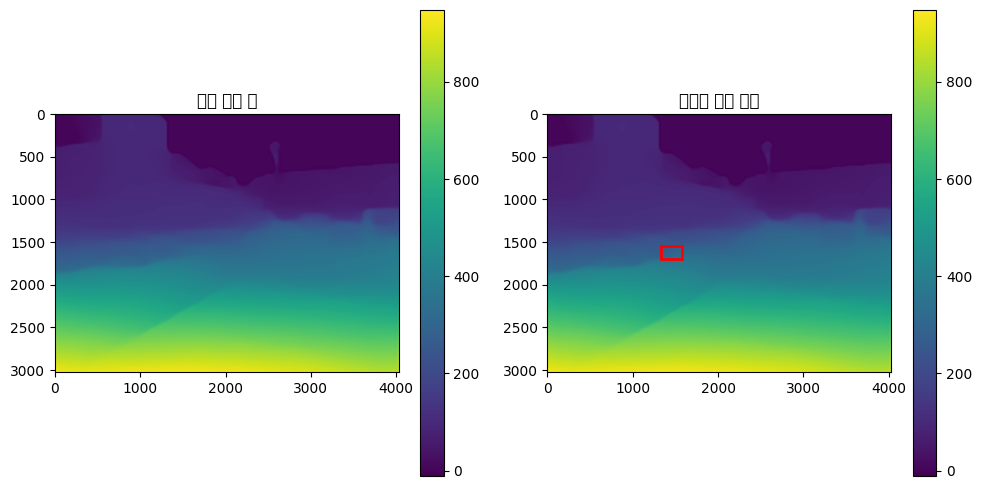

2024-12-20 15:26:11.846 Python[7347:921437] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-20 15:26:11.846 Python[7347:921437] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Folder: data1, File: 202411041419-36.331165-127.333801-2.jpg


Using cache found in /Users/chlwjddn/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /Users/chlwjddn/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Loading weights:  None


Using cache found in /Users/chlwjddn/.cache/torch/hub/intel-isl_MiDaS_master


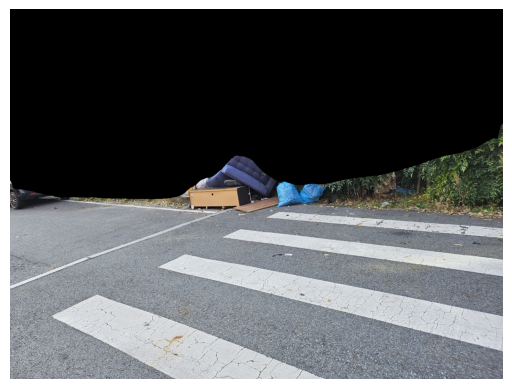

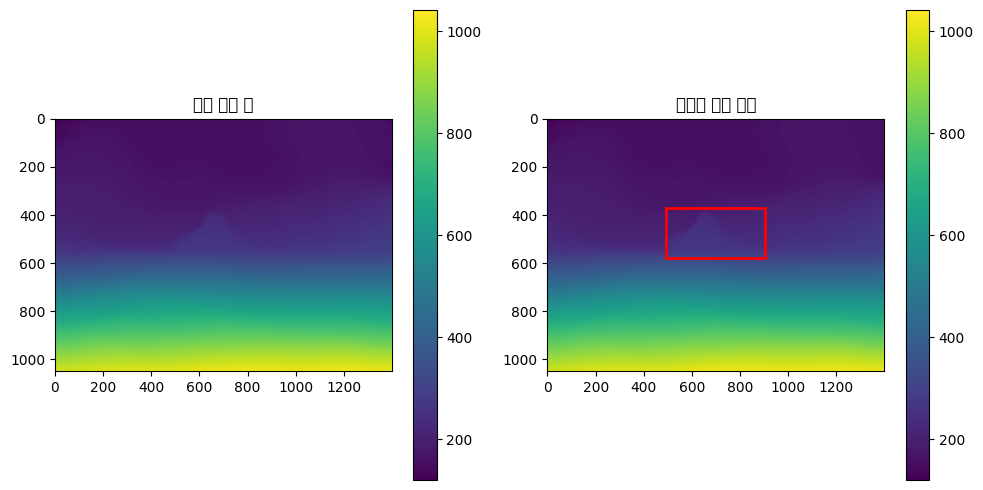

Folder: data1, File: 202411041438-36.321129-127.342652-2.jpg


Using cache found in /Users/chlwjddn/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /Users/chlwjddn/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Loading weights:  None


Using cache found in /Users/chlwjddn/.cache/torch/hub/intel-isl_MiDaS_master


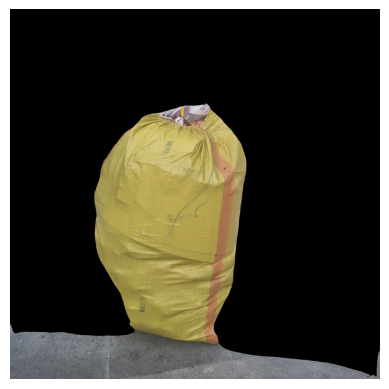

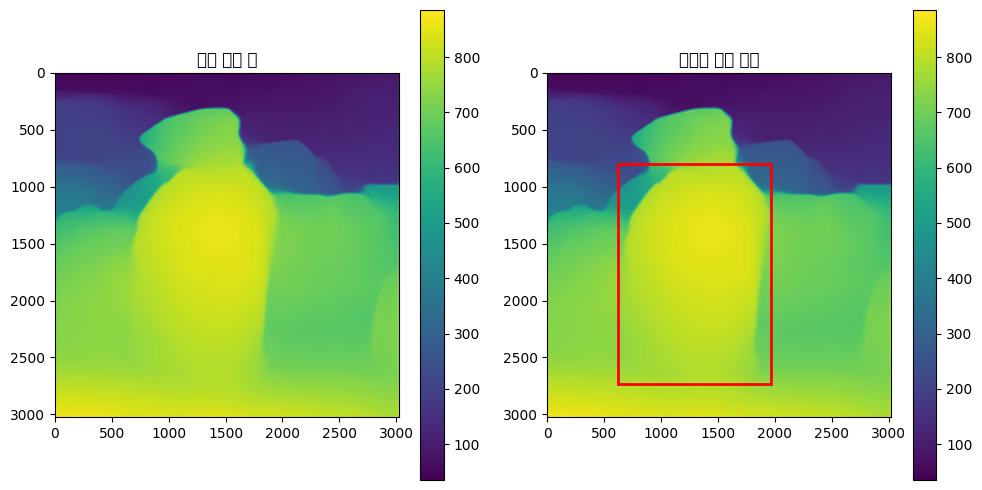

Folder: data1, File: 20240703_174740.jpg


Using cache found in /Users/chlwjddn/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /Users/chlwjddn/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Loading weights:  None


Using cache found in /Users/chlwjddn/.cache/torch/hub/intel-isl_MiDaS_master


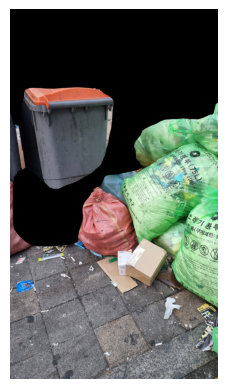

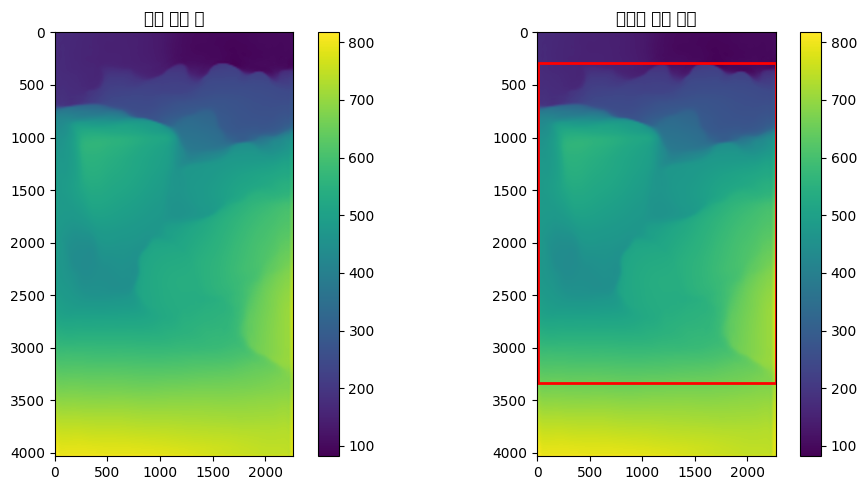

In [ ]:
ort_session = ort.InferenceSession("yolow-l.onnx")
folder_path = "data1"  # 이미지가 저장된 폴더 경로 입력
process_folder(folder_path)